In [1]:
import utils
import json
from mapboxfetcher import MapBoxFetcher
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import PIL
import pickle
from treemodel import TreeModel
import imagefunctions
import os.path
import cv2
from skimage.filters.rank import entropy, mean
from skimage.morphology import square, disk
from shapely.geometry import Polygon
%load_ext autoreload
%autoreload 2

In [112]:
c_y = 23122
with open('Data/Predictions-Y{}.p'.format(c_y), 'rb') as f:
    y_preds = pickle.load(f)
c_item = y_preds[0]
c_x = c_item['x']
c_y = c_item['y']
c_pred = c_item['pred']
print(c_x)

33927


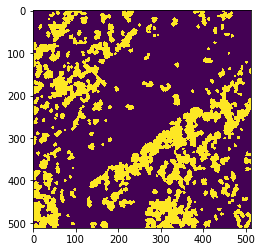

In [113]:
plt.imshow(c_pred)

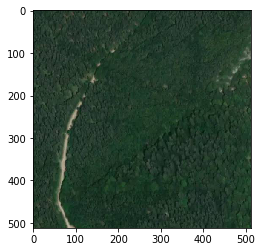

In [114]:
fetcher = MapBoxFetcher()
sat_img = fetcher.satellite(c_x, c_y, 16, hq=True)
sat_img.show()

In [88]:
def calculate_density(pred):
    return np.count_nonzero(pred) / pred.size

def calculate_sparsity(pred):
    ret, thresh_entropy = cv2.threshold(entropy(pred, disk(3)), 0.5, 1, cv2.THRESH_BINARY)
    plt.imshow(thresh_entropy)
    entropy_zero_count = np.count_nonzero(thresh_entropy)
    normal_zero_count = np.count_nonzero(pred)
    if normal_zero_count == 0:
        sparsity = 1
    elif entropy_zero_count == 0:
        sparsity = 1 / pred.size
    elif entropy_zero_count > normal_zero_count:
        sparsity = 1
    else:
        sparsity = entropy_zero_count / normal_zero_count
    return sparsity

In [89]:
density = calculate_density(c_pred)
print(density)

0.6200523376464844


c:\program files\python36\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


0.31114228234990127


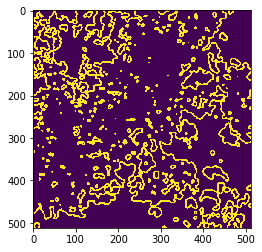

In [90]:
sparsity = calculate_sparsity(c_pred)
print(sparsity)